# Graduate Admissions Prediction Project
The dataset I used is 'Graduate Admissions 2', which is an updated version of 'Graduate Admissions' from Kaggle: Mohan Acharya: https://www.kaggle.com/mohansacharya/graduate-admissions.

The goal of this project is to understand the Graduate Admissions dataset, get some insights from it, and finally to train a model that can predict the chances of admission.

## Import Statements

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Data Import

In [165]:
data = pd.read_csv("admissions.csv")

## Data Descriptions
#### Shows the data header (first 5 rows)

In [166]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [167]:
data.shape

(500, 9)

We see that our dataset has 500 rows and 9 columns. Our target variable is Chance of Admit. Also, we notice that Serial No. can be used as our indices instead of Pandas' default dataframe indices, which leaves us with 7 features to consider for our prediction: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research.

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [169]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

We see that there is an extra space in the "Chance of Admit" and "LOR" columns, so we will fix that first.

In [170]:
data.rename(columns={"Chance of Admit ": "Chance of Admit",
                    "LOR ": "LOR"}, inplace=True)

In [171]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [172]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


This dataset doesn't seem to have any null values, so there is not much cleaning needed. We will just change the indexing below as stated before.

In [173]:
data.set_index('Serial No.', inplace = True)

In [174]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## EDA (Exploratory Data Analysis)
#### Create ticks on the x-axis

In [175]:
sns.set(style="ticks")

#### Let's first create a pairplot of the overall data given

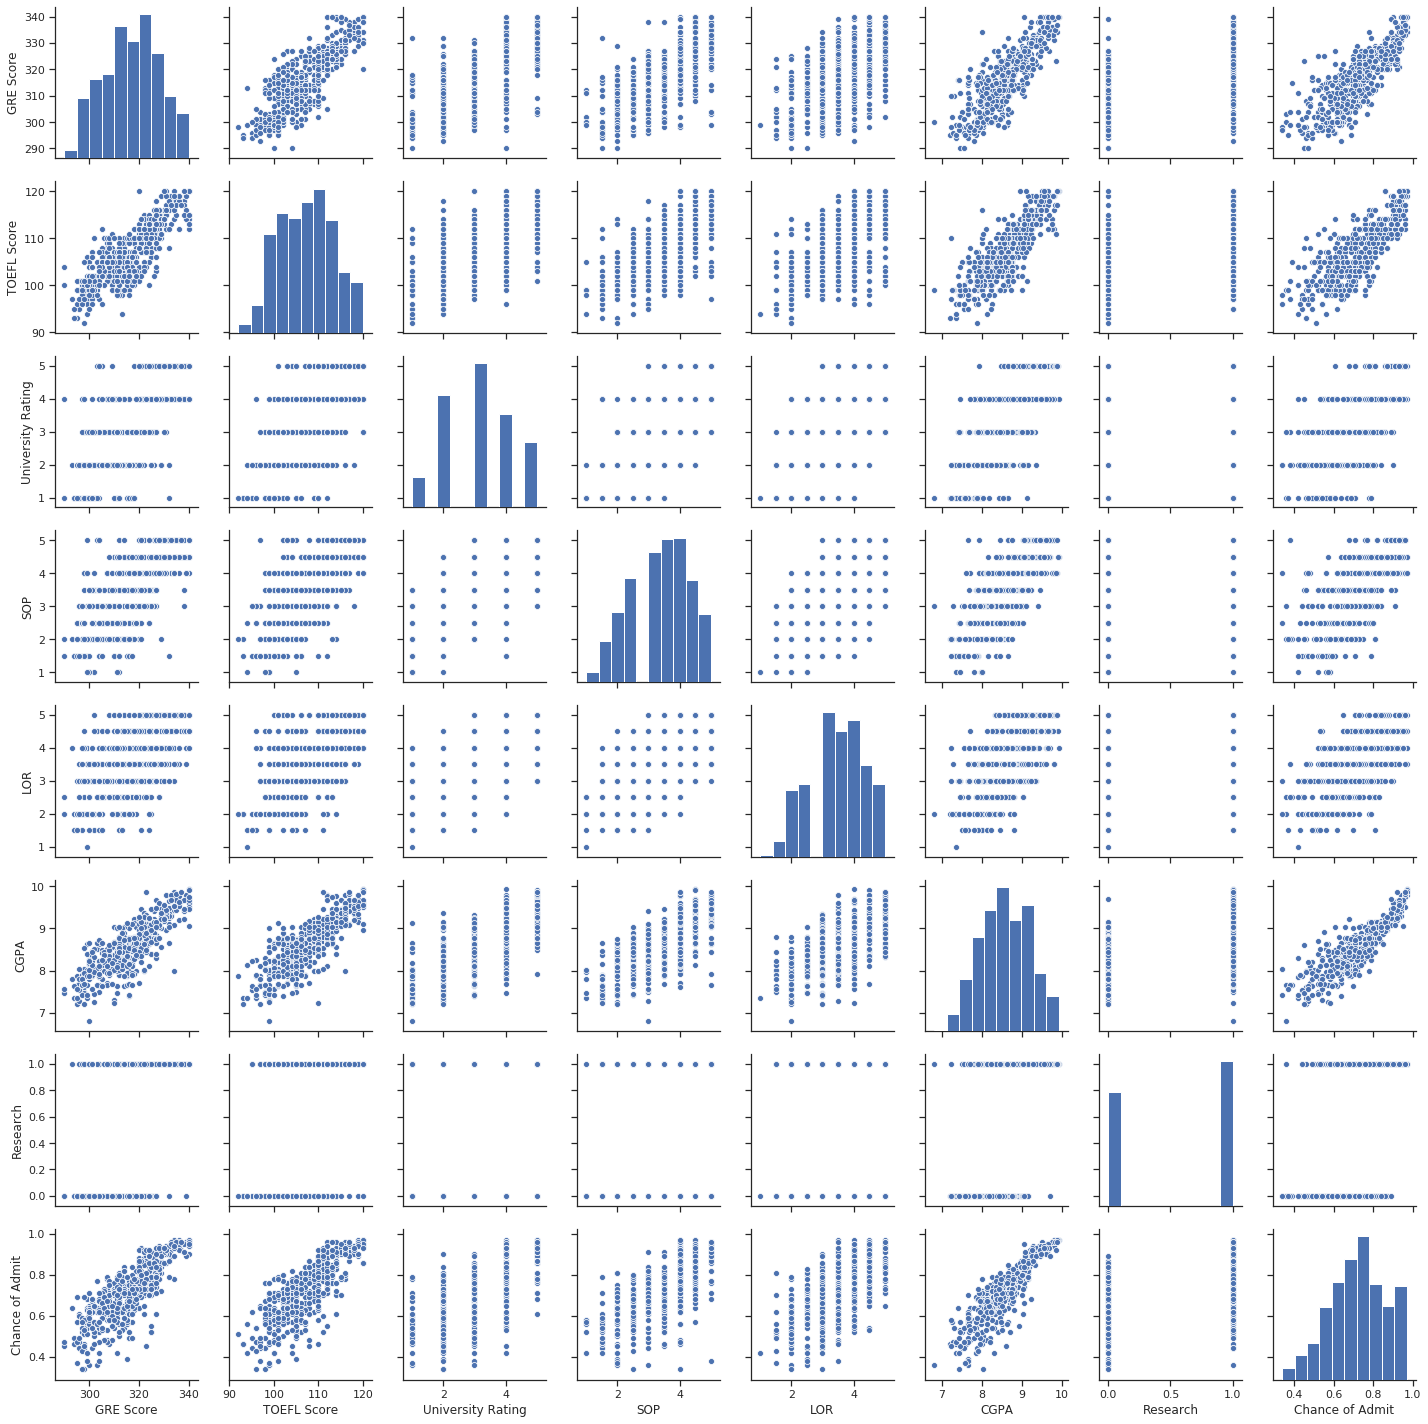

In [176]:
sns.pairplot(data)
plt.show()

#### Let's make another pairplot, this time grouping those who had research experience and those who did not just for my curiosity

/srv/app/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/srv/app/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


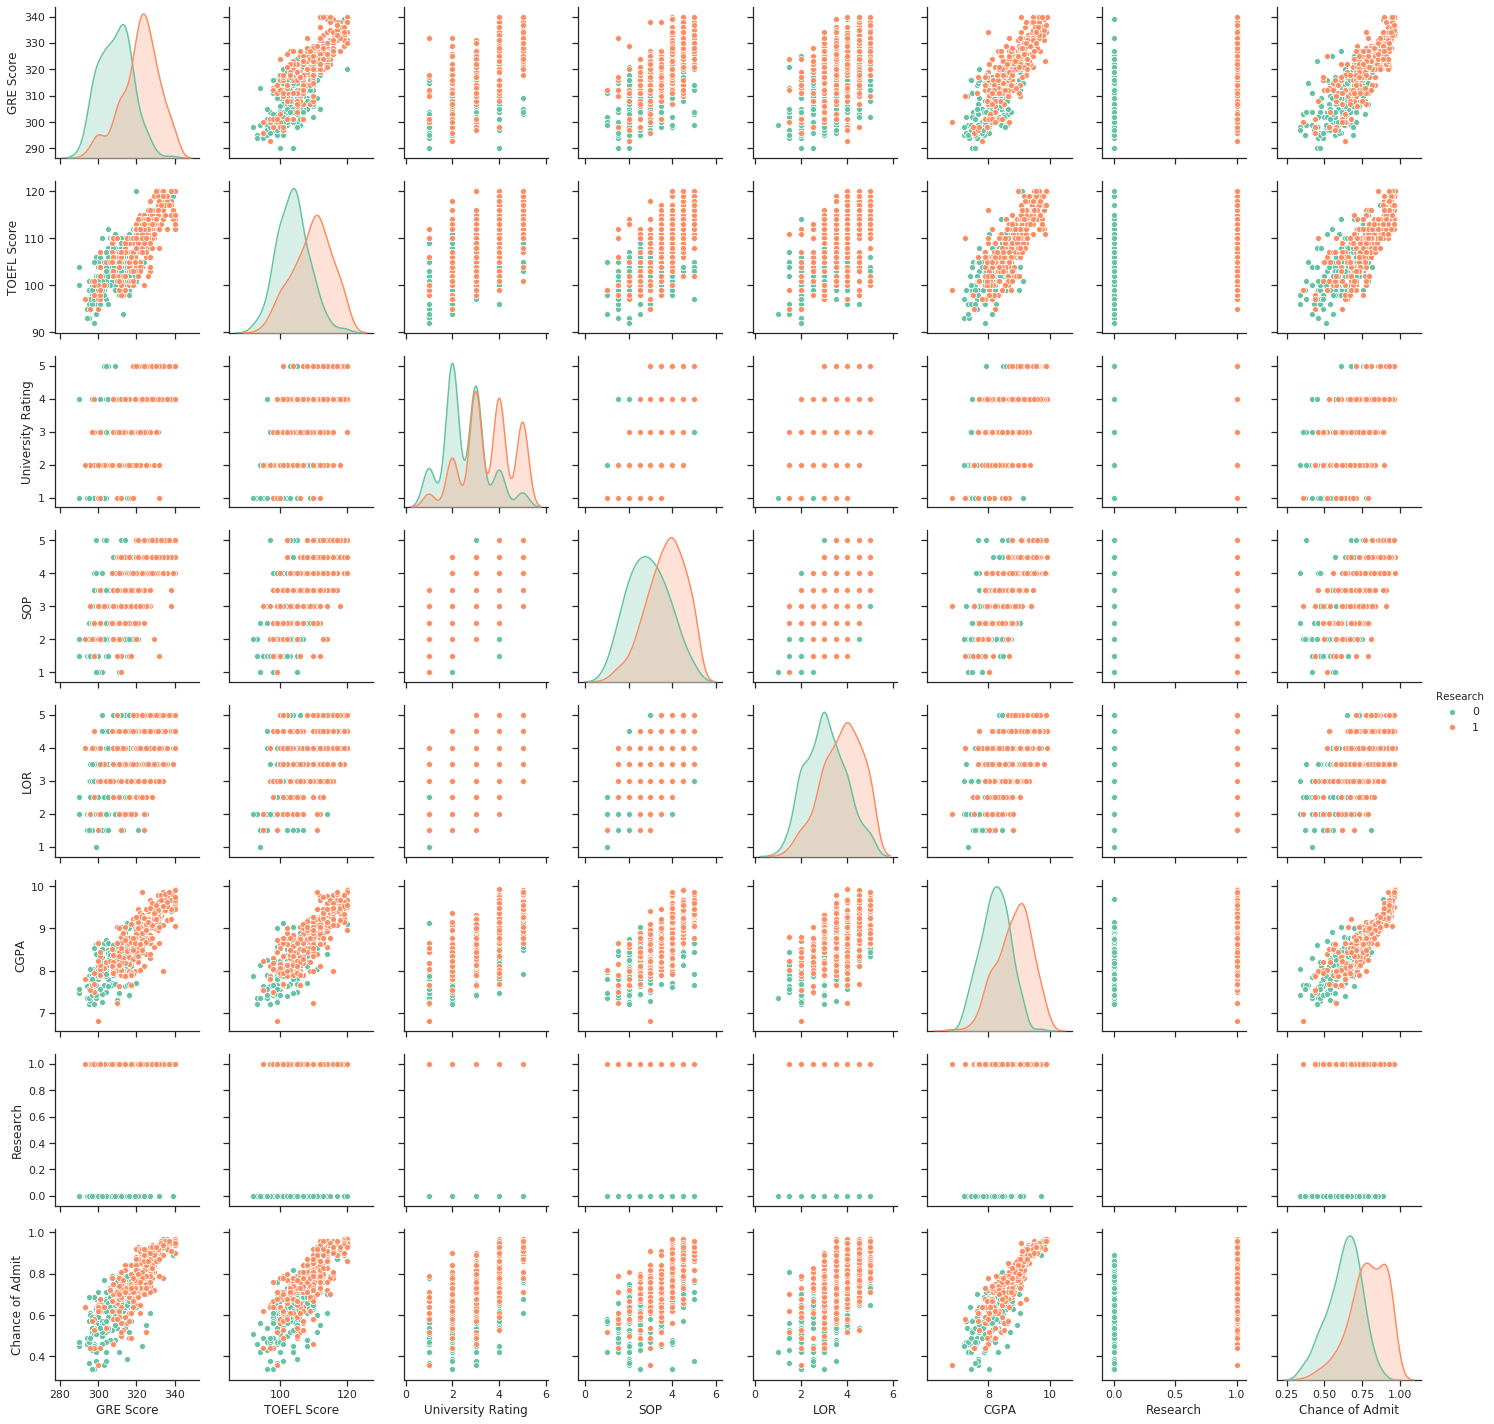

In [177]:
fig = sns.pairplot(data, hue='Research', palette="Set2")
plt.show()

#### Let's make some boxplots and violin plots to help us visualize the distributions of each input variable. 
These boxplots and violinplots help us visualize the information we have from using the describe method we used on our dataset. We see that it doesn't really make any sense for research to be plotted as either since it is binary (0 or 1), so we will create a histogram for it instead.

In [178]:
my_colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#EE82EE"]

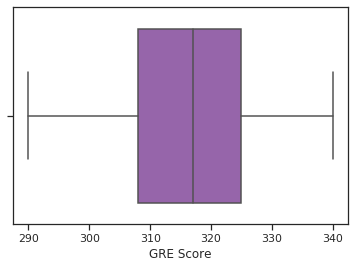

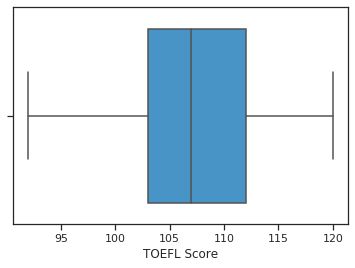

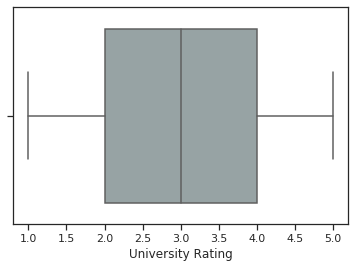

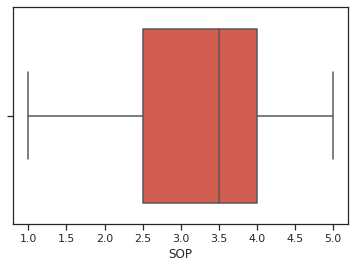

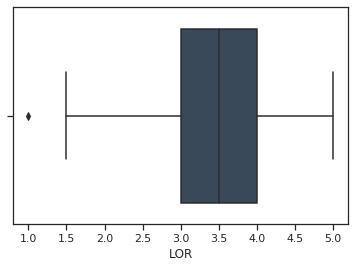

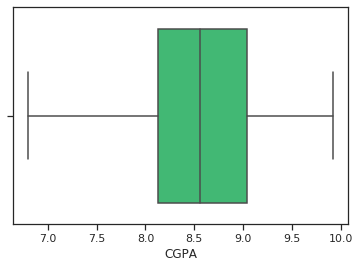

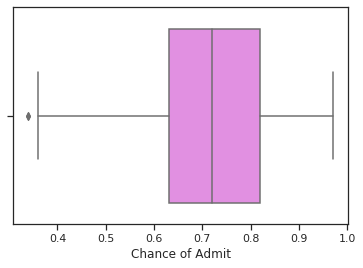

In [179]:
for i, col in enumerate(data.columns.drop('Research')):
    plt.figure(i)
    sns.boxplot(data=data, x=col, color=my_colors[i], saturation=0.75)

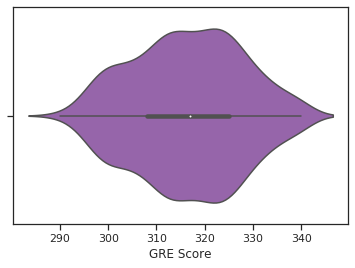

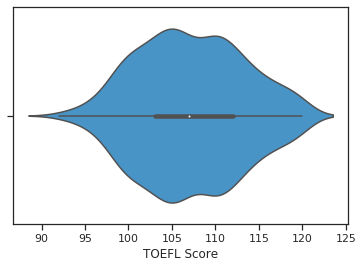

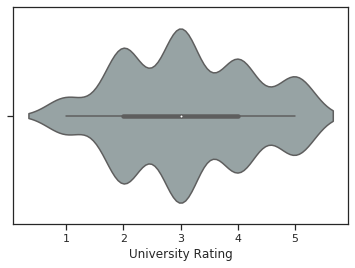

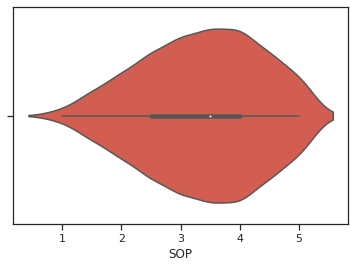

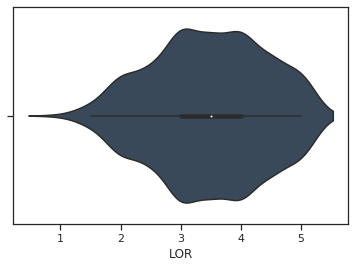

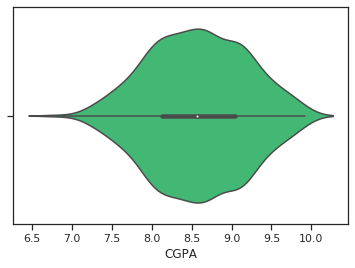

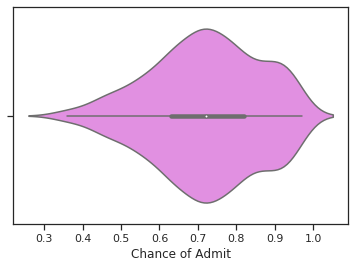

In [180]:
for i, col in enumerate(data.columns.drop('Research')):
    plt.figure(i)
    sns.violinplot(data=data, x=col, color=my_colors[i], saturation=0.75)

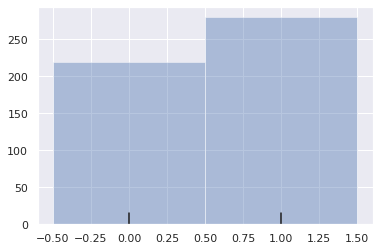

In [181]:
sns.set()
sns.distplot(data[['Research']], kde=False, bins=np.arange(0,3)-0.5);
plt.axvline(x=0, ymin=0, ymax=1/20, color = 'k')
plt.axvline(x=1, ymin=0, ymax=1/20, color = 'k')

#### Histograms of input variables

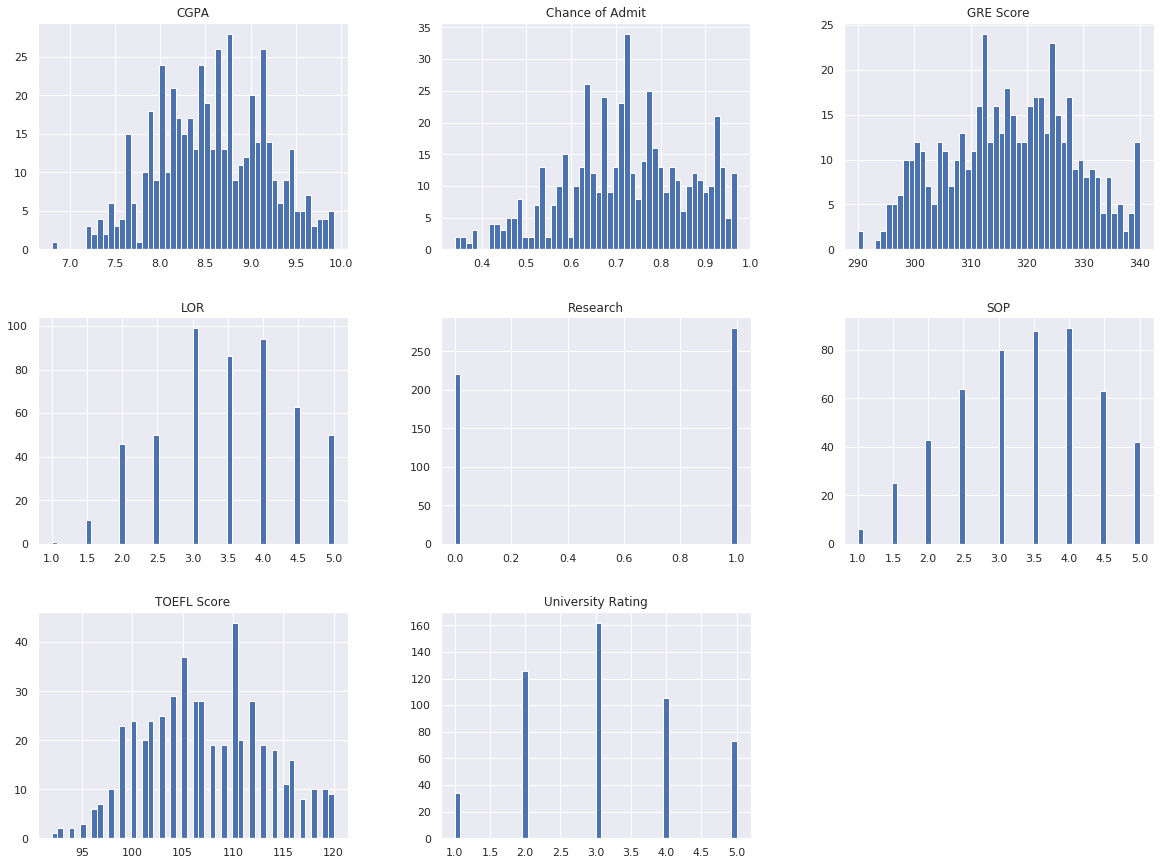

In [182]:
data.hist(bins = 50, figsize=(20, 15), color = 'b')
plt.show()

#### Correlation Heatmap

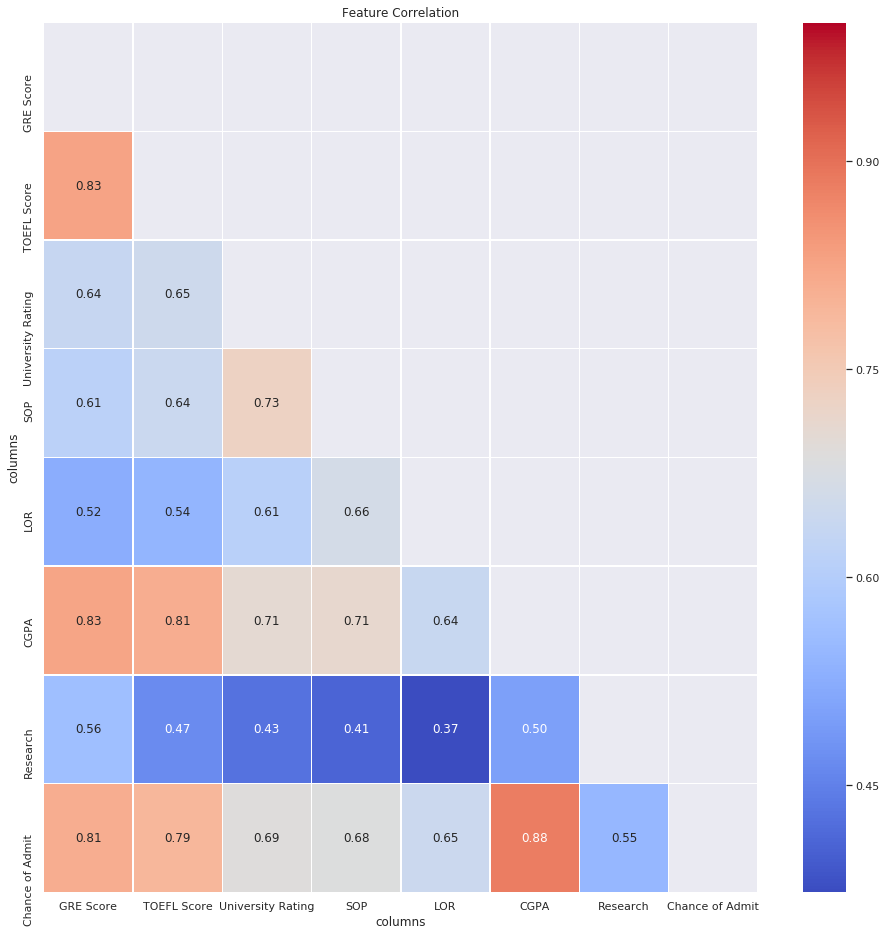

In [183]:
fig, ax = plt.subplots(figsize=(16,16)) 
dropSelf = np.zeros_like(data.corr())
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm', linewidths=0.5, fmt="0.2f", mask=dropSelf).set(
    title = 'Feature Correlation', xlabel = 'columns', ylabel = 'columns')
plt.show()

Awesome! We see that CGPA, GRE Score, and TOEFL Scores are highly correlated with chance of admissions. Let's create a correlation matrix that also shows us the correlations sorted in descending order, but is easier on the eye than the heatmap we created previously.

In [184]:
corr_matrix = data.corr()
corr_matrix["Chance of Admit"].sort_values(ascending = False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64

### Linear Regression Model
##### We will now build a model for our prediction. We will split 80% of our data to the training set and 20% to our test set.

__Data Split 1:__ using all of our data __without__ scaling.

In [185]:
y = data['Chance of Admit']
X = data.drop(['Chance of Admit'], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=43)

__Data Split 2:__ using all of our data __with__ scaling

In [186]:
scaler = StandardScaler()

X2_train = scaler.fit_transform(X1_train)
X2_test = scaler.fit_transform(X1_test)

y2_train = y1_train
y2_test = y1_test

#### Test Training Split

In [187]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
model1_pred = model1.predict(X1_test)
model2_pred = model2.predict(X2_test)

Linear Regression Performances:

All features without scaling:
MAE: 0.047563854147841776
RMSE: 0.0657997905429687
R2_Score:  0.8064808163978363

All features with scaling:
MAE: 0.047565322598116036
RMSE: 0.06838316761267081
R2_Score:  0.7909869372806454


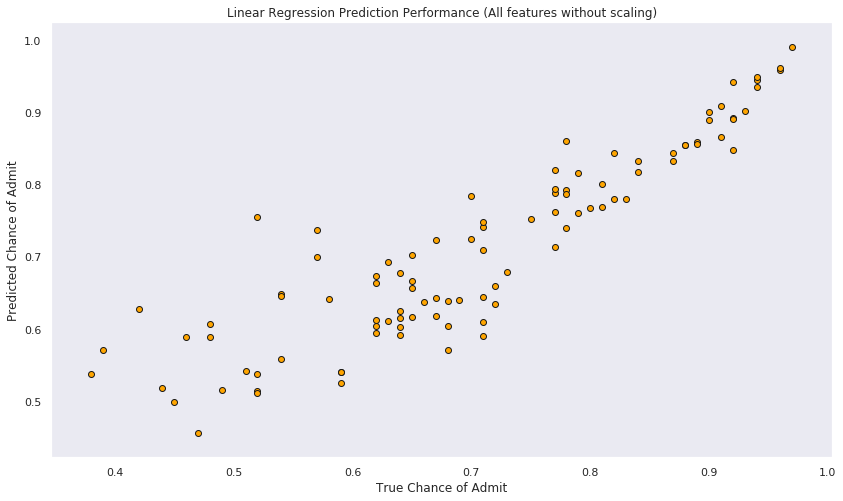

In [189]:
print('Linear Regression Performances:')

print('\nAll features without scaling:')
print('MAE:', metrics.mean_absolute_error(y1_test, model1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, model1_pred)))
print('R2_Score: ', metrics.r2_score(y1_test, model1_pred))

print('\nAll features with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, model2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, model2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, model2_pred))

fig = plt.figure(figsize=(14, 8))
plt.scatter(y1_test, model1_pred, color='orange', linewidths=1, edgecolors='k')
plt.xlabel('True Chance of Admit') 
plt.ylabel('Predicted Chance of Admit') 
plt.title('Linear Regression Prediction Performance (All features without scaling)') 
plt.grid()
plt.show()

In [190]:
model1.intercept_

-1.3362618605063061

In [191]:
model1.coef_

array([0.00198402, 0.00309087, 0.00141081, 0.00080578, 0.01883725,
       0.11840323, 0.02139413])

In [192]:
model1_result = pd.DataFrame(X.columns.values, columns = ['Features'])
model1_result['Weights'] = model1.coef_
model1_result

,Features,Weights
0,GRE Score,0.001984
1,TOEFL Score,0.003091
2,University Rating,0.001411
3,SOP,0.000806
4,LOR,0.018837
5,CGPA,0.118403
6,Research,0.021394


In [193]:
model2.intercept_

0.7255750000000002

In [194]:
model2.coef_

array([0.02193111, 0.01913567, 0.00162333, 0.00079382, 0.01746837,
       0.07104231, 0.01055925])

In [195]:
model2_result = pd.DataFrame(X.columns.values, columns = ['Features'])
model2_result['Weights'] = model2.coef_
model2_result

,Features,Weights
0,GRE Score,0.021931
1,TOEFL Score,0.019136
2,University Rating,0.001623
3,SOP,0.000794
4,LOR,0.017468
5,CGPA,0.071042
6,Research,0.010559


#### Let's check out our residuals!

In [196]:
model1_result = pd.DataFrame(model1_pred, columns=['Predictions'])
model1_result.head()

,Predictions
0,0.656861
1,0.739427
2,0.640408
3,0.847544
4,0.606705


In [197]:
model1_result['Target'] = y1_test
model1_result.head()

,Predictions,Target
0,0.656861,NaN
1,0.739427,NaN
2,0.640408,NaN
3,0.847544,NaN
4,0.606705,NaN


In [198]:
model1_result['Target'] = y1_test.reset_index(drop=True)
model1_result.head()

,Predictions,Target
0,0.656861,0.65
1,0.739427,0.78
2,0.640408,0.69
3,0.847544,0.92
4,0.606705,0.48


In [199]:
model1_result['Residual'] = model1_result['Target'] - model1_result['Predictions']
model1_result

,Predictions,Target,Residual
0,0.656861,0.65,-0.006861
1,0.739427,0.78,0.040573
2,0.640408,0.69,0.049592
3,0.847544,0.92,0.072456
4,0.606705,0.48,-0.126705
5,0.723663,0.70,-0.023663
6,0.788264,0.77,-0.018264
7,0.769274,0.81,0.040726
8,0.624419,0.64,0.015581
9,0.737383,0.57,-0.167383


#### Let's do the same thing for our second model. 

In [200]:
model2_result = pd.DataFrame(model2_pred, columns=['Predictions'])
model2_result.head()

,Predictions
0,0.669878
1,0.751512
2,0.653400
3,0.857677
4,0.619160


In [201]:
model2_result['Target'] = y2_test
model2_result.head()

,Predictions,Target
0,0.669878,NaN
1,0.751512,NaN
2,0.653400,NaN
3,0.857677,NaN
4,0.619160,NaN


In [202]:
model2_result['Target'] = y2_test.reset_index(drop=True)
model2_result.head()

,Predictions,Target
0,0.669878,0.65
1,0.751512,0.78
2,0.653400,0.69
3,0.857677,0.92
4,0.619160,0.48


In [203]:
model2_result['Residual'] = model2_result['Target'] - model2_result['Predictions']
model2_result

,Predictions,Target,Residual
0,0.669878,0.65,-0.019878
1,0.751512,0.78,0.028488
2,0.653400,0.69,0.036600
3,0.857677,0.92,0.062323
4,0.619160,0.48,-0.139160
5,0.731216,0.70,-0.031216
6,0.796530,0.77,-0.026530
7,0.779729,0.81,0.030271
8,0.639350,0.64,0.000650
9,0.748911,0.57,-0.178911


## Random Forest

Let's first try random forest with our data splits.

In [204]:
rf1 = RandomForestRegressor(random_state=43, n_estimators=200)
rf2 = RandomForestRegressor(random_state=43, n_estimators=200)

rf1.fit(X1_train, y1_train)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=43, verbose=0,
                      warm_start=False)

In [205]:
rf1_pred = rf1.predict(X1_test)
rf2_pred = rf2.predict(X2_test)

Random Forest Performance:

all features, No scaling:
MAE: 0.05041700000000004
RMSE: 0.0718249664114088
R2_Score:  0.7694177545831946

selected features, No scaling:
MAE: 0.05167750000000008
RMSE: 0.07264896885021846
R2_Score:  0.7640967577495051


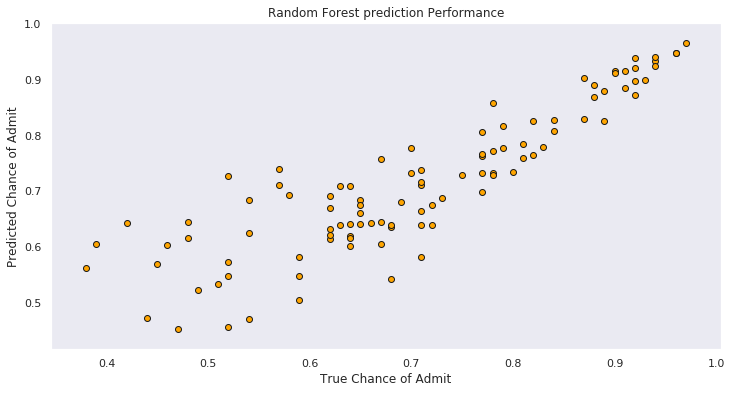

In [206]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y1_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y1_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y1_test,rf1_pred,color='orange', linewidths=1, edgecolors='k')
plt.xlabel('True Chance of Admit') 
plt.ylabel('Predicted Chance of Admit') 
plt.title('Random Forest prediction Performance') 
plt.grid()
plt.show()

## Gradient Boosting
#### Training
We will train the GBM regressor with the default parameter values

In [207]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features=None, random_state=101)
gbm2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features=None, random_state=101)

gbm1.fit(X1_train, y1_train)
gbm2.fit(X2_train, y2_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=101, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [208]:
gbm1_pred = gbm1.predict(X1_test)
gbm2_pred = gbm2.predict(X2_test)

Gradiant Boosting Performance:

all features, No scaling:
MAE: 0.04853977919109118
RMSE: 0.07104752041506726
R2_Score:  0.7743824640223501

selected features, No scaling:
MAE: 0.051008116442227795
RMSE: 0.07243024565829491
R2_Score:  0.7655150803770543


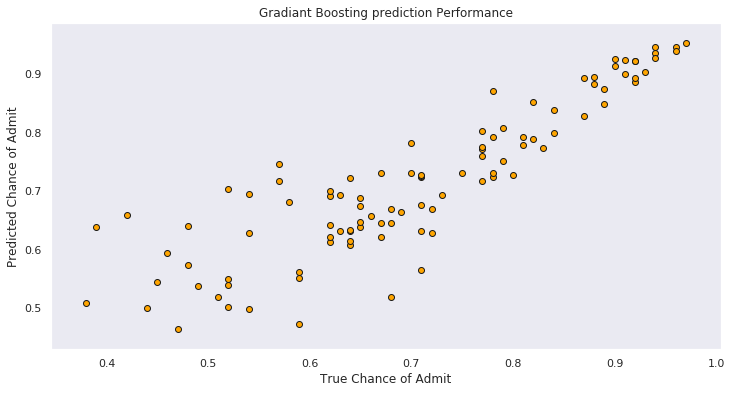

In [209]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y1_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y1_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, gbm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, gbm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, gbm2_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y1_test,gbm1_pred,color='orange', linewidths=1, edgecolors='k')
plt.xlabel('True Chance of Admit') 
plt.ylabel('Predicted Chance of Admit') 
plt.title('Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

We see that the Gradient Boost model has similar performance on our dataset to that of the Random Forest model.

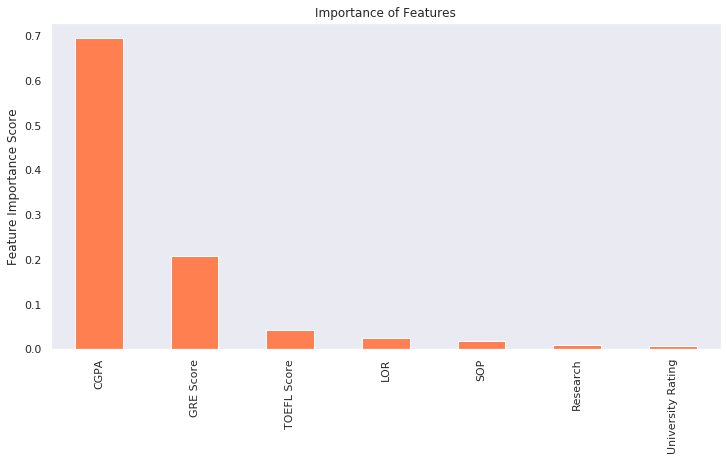

In [210]:
feat_imp = pd.Series(gbm1.feature_importances_, list(X1_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

We see that the two most important features to predict Chance of Admit are __CGPA__ and __GRE Score.__

# Conclusion

In this project, we the dataset to build a Graduate Admit predictor. 3 different learning regressors (Linear Regression, Random Forest, and Gradiant Boosting) were tested, and we have acheived the best prediction performance using Linear Regression, followed by Gradiant Boosting, and then Random Forest.

The best prediction performance was acheived using Linear Regression, using all features in the dataset, and resulted in the following metrics:
###### MAE: 0.04396863063294708
###### RMSE: 0.06136605787480696
###### R2_Score:  0.7767101021347025

We must take into account that the Chance to Admit values in the dataset ranges from 0.34 to 0.97.

# Future Work

In the future where there is more time, I believe that we can optimize our Random Forest and Gradient Boost algorithms by using some kind of GridSearch, which I do not have a lot of experience with, but will definitely look more into it in the future.